## Zillow Data

## Project Outline:
- Deliver presenatation: Monday morning, 20 June
- Day 0: Today: Tuesday, 14 June
    - project outline and outlier handling
    - incorporate the last project's findings/recommendations as an intro/recap
- Day 1: Wednesday: Full Wrangle and Explore
    - define high logerror, visually plot variables with a high propensity to produce distinct logerror clusters >> end the day with clusters
- Day 2: Thurday: Full Explore
    - fully explore clusters/subsets and 
- Day 3: Friday: Model and produce fianl notebook, README, and 
    - model the logerror by cluster with an appropriate linear regression predictor (predicts continuous values)

## 1. Wrangle

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import env
import os
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import wrangle
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

In [2]:
#acquire the zillow data
full_df = wrangle.get_zillow_data()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   buildingclasstypeid           0 non-null      float64
 2   heatingorsystemtypeid         33936 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   storytypeid                   47 non-null     float64
 6   propertylandusetypeid         52442 non-null  float64
 7   parcelid                      52442 non-null  int64  
 8   id                            52442 non-null  int64  
 9   logerror                      52442 non-null  float64
 10  transactiondate               52442 non-null  object 
 11  id.1                          52442 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

### Notes:
 - initial SQL query returned 69 columns and 52442 rows

In [3]:
# run the data through our function to handle missing values
remove_nulls_df = wrangle.handle_missing_values(full_df)
remove_nulls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52440 non-null  float64
 1   parcelid                      52440 non-null  int64  
 2   id                            52440 non-null  int64  
 3   logerror                      52440 non-null  float64
 4   transactiondate               52440 non-null  object 
 5   id.1                          52440 non-null  int64  
 6   bathroomcnt                   52440 non-null  float64
 7   bedroomcnt                    52440 non-null  float64
 8   calculatedbathnbr             52305 non-null  float64
 9   calculatedfinishedsquarefeet  52360 non-null  float64
 10  finishedsquarefeet12          52195 non-null  float64
 11  fips                          52440 non-null  float64
 12  fullbathcnt                   52305 non-null  float64
 13  l

### Notes:
- removing >30% null columns and > 25% null rows returns a df with 30 cols and 52440 rows
- dropped 39 columns and 2 rows

In [4]:
remove_columns_df = wrangle.remove_columns(remove_nulls_df)
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  float64
 6   latitude                      52440 non-null  float64
 7   longitude                     52440 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   propertycountylandusecode     52440 non-null  object 
 10  roomcnt                       52440 non-null  float64
 11  yearbuilt                     52326 non-null  float64
 12  taxvaluedollarcnt             52439 non-null  float64
 13  p

In [5]:
remove_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  float64
 6   latitude                      52440 non-null  float64
 7   longitude                     52440 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   propertycountylandusecode     52440 non-null  object 
 10  roomcnt                       52440 non-null  float64
 11  yearbuilt                     52326 non-null  float64
 12  taxvaluedollarcnt             52439 non-null  float64
 13  p

In [8]:
clean_d_types_df = wrangle.convert_data_types(remove_columns_df)
clean_d_types_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52440 entries, 0 to 52441
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52440 non-null  float64
 1   transactiondate               52440 non-null  object 
 2   bathroomcnt                   52440 non-null  float64
 3   bedroomcnt                    52440 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52440 non-null  object 
 6   latitude                      52440 non-null  object 
 7   longitude                     52440 non-null  object 
 8   lotsizesquarefeet             52073 non-null  float64
 9   propertycountylandusecode     52440 non-null  object 
 10  roomcnt                       52440 non-null  float64
 11  yearbuilt                     52326 non-null  float64
 12  taxvaluedollarcnt             52439 non-null  float64
 13  p

In [9]:
clean_d_types_df.isna().sum()

logerror                          0
transactiondate                   0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet     80
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               367
propertycountylandusecode         0
roomcnt                           0
yearbuilt                       114
taxvaluedollarcnt                 1
propertylandusedesc               0
dtype: int64

### I still have nulls in my data, I need to get rid of them before proceeding. I'm going to remove regionidcity from the dataframe becasue it has more than 2% of the total data missing, and that's a risk to impute for a categorical variable. All others I'm comfortable imputing: 

In [11]:



no_nulls_df = wrangle.handle_remaining_nulls(clean_d_types_df)
no_nulls_df.isna().sum()

#success!

logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
propertylandusedesc             0
dtype: int64

In [44]:
# now run the full wrangle functions to test them
df = wrangle.get_zillow_data()
df = wrangle.prep_zillow(df)

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']
       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0         1.173897    0.736871                      1.172918   
1         1.270673    1.370886                      0.456237   
2         0.292845    0.317008                      0.677444   
3         0.684983    0.736871                      0.451506   
4         0.684983    0.736871                      1.035411   
...            ...         ...                           ...   
52437     0.292845    1.370886                      0.634597   
52438     0.292845    0.736871                      0.309763   
52439     1.270673    0.317008                      0.887689   
52440     0.292845    0.317008                      0.160299   
52441     0.292845    0.317008                      0.869754   

       lotsizesquarefeet   roomcnt  yearbuilt  taxvaluedollarcnt  
0               0.079053  0.601872  

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


In [46]:
df = wrangle.wrangle_zillow()

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']
       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
0         1.173897    0.736871                      1.172918   
1         1.270673    1.370886                      0.456237   
2         0.292845    0.317008                      0.677444   
3         0.684983    0.736871                      0.451506   
4         0.684983    0.736871                      1.035411   
...            ...         ...                           ...   
52437     0.292845    1.370886                      0.634597   
52438     0.292845    0.736871                      0.309763   
52439     1.270673    0.317008                      0.887689   
52440     0.292845    0.317008                      0.160299   
52441     0.292845    0.317008                      0.869754   

       lotsizesquarefeet   roomcnt  yearbuilt  taxvaluedollarcnt  
0               0.079053  0.601872  

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


In [48]:
# we can see that we ended up with 52,377 rows after cleaning the data.
# we started with 52,442 from the initial SQL query
# down to 50,449 rows and 21 columns. May chop more

## Understanding the target variable:
1. The target variable is logerror
2. 𝑙𝑜𝑔𝑒𝑟𝑟𝑜𝑟=𝑙𝑜𝑔(𝑍𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒)−𝑙𝑜𝑔(𝑆𝑎𝑙𝑒𝑃𝑟𝑖𝑐𝑒)
    - its log(zillow's estimated home price) - log(actual sale price)
    - I have logerror
    - I have an approximation of the estimated home price in taxvaluedollarcnt
    - therefore: logerror + log(taxvaluedollarcount) = log(zillow estimated home price)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50673 entries, 0 to 52441
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      50673 non-null  float64
 1   transactiondate               50673 non-null  object 
 2   bathroomcnt                   50673 non-null  float64
 3   bedroomcnt                    50673 non-null  float64
 4   calculatedfinishedsquarefeet  50673 non-null  float64
 5   fips                          50673 non-null  object 
 6   latitude                      50673 non-null  object 
 7   longitude                     50673 non-null  object 
 8   lotsizesquarefeet             50673 non-null  float64
 9   roomcnt                       50673 non-null  float64
 10  yearbuilt                     50673 non-null  float64
 11  taxvaluedollarcnt             50673 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.0+ MB


In [50]:
df.head()

,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt
0,0.025595,2017-01-01,3.5,4.0,3100.0,orange_county,33634931.0,-117869207.0,4506.0,0.0,1998.0,1023282.0
1,0.055619,2017-01-01,1.0,2.0,1465.0,ventura,34449266.0,-119281531.0,12647.0,5.0,1967.0,464000.0
2,0.005383,2017-01-01,2.0,3.0,1243.0,orange_county,33886168.0,-117823170.0,8432.0,6.0,1962.0,564778.0
3,-0.103410,2017-01-01,3.0,4.0,2376.0,los_angeles,34245180.0,-118240722.0,13038.0,0.0,1970.0,145143.0
4,-0.001011,2017-01-01,3.0,4.0,2962.0,los_angeles,34145202.0,-118179824.0,63000.0,0.0,1950.0,773303.0


<AxesSubplot:>

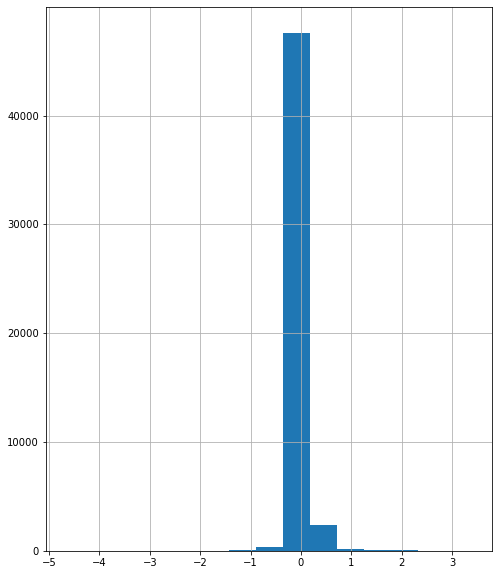

In [52]:
df.logerror.hist(figsize=(8, 10), bins=15)

array([[<AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:>]], dtype=object)

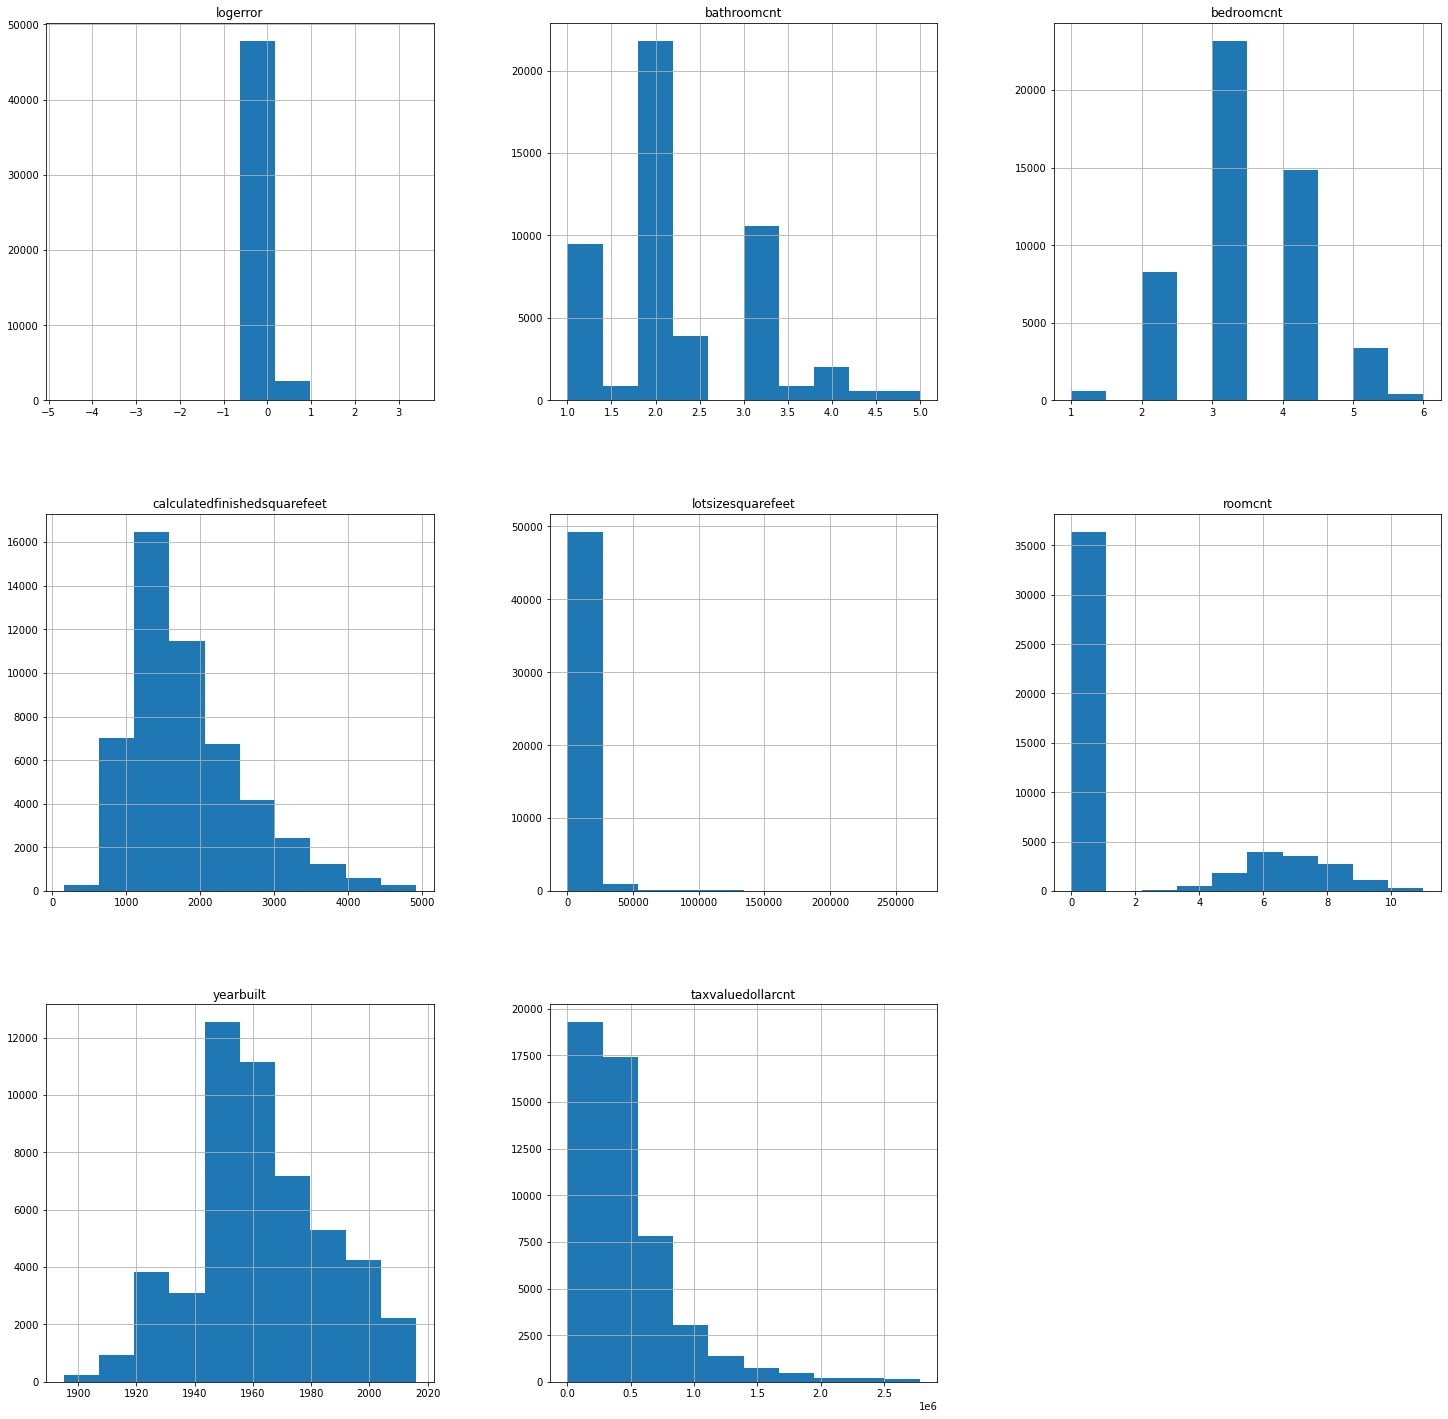

In [53]:
df.hist(figsize=(25, 25))

### Takeaways from single variable distributions:
- logerror is normal, centered on 0
- baths is right skewed, centered on 2
- beds is right skewed, centered on 4
- finishedsqft is right skewed, centered 2500
- fips is divided unequally among 3 counties, with LA highest
- roomcnt has a normal dist around 6.5, where not null or 0 (lots of zeroes). Is the number of zeroes throwing off the zestimate? I'm going to drop this from my modeling df
- year built is is right skewed, centered on 1950-60
- get rid of columns with mainly one value:
    - assessemnt year
    - unitcnt
    - finishedsquareft12 is same as calculatedfinishedsqft
- make zips/ids into objects:
    - regionidzip
    - regionidcounty
    - regionidcity

### I'm creating 'logerror_bins' so that I can isolate high logerror rows from the DF and then investigate the drivers of logerror in those cases

In [54]:
bins = [-4.33, -2.33, -1.8, -1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.8, 2.33, 4.33 ]
df['logerror_bins'] = pd.cut(df.logerror, bins)


## I'm creating 'zillow_price_est' so that I can directly compare it with taxvaluedollarcnt
- ln(error) + ln(taxvaluedollarcount) = ln(zillow estimated home price)
- inv.ln(logerr + log(taxvaluedollarcnt)) = zillow estimated home price


In [55]:
df['zillow_price_est'] = np.e**((df.logerror) + np.log(df.taxvaluedollarcnt))
df.zillow_price_est.head

<bound method NDFrame.head of 0        1.049811e+06
1        4.905384e+05
2        5.678263e+05
3        1.308838e+05
4        7.725216e+05
             ...     
52437    3.620075e+05
52438    6.809857e+04
52439    5.142016e+04
52440    5.257740e+05
52441    2.128020e+05
Name: zillow_price_est, Length: 50673, dtype: float64>

## Create zillow error to get price estimate error in dollars

In [56]:
df['zillow_error'] = df.zillow_price_est - df.taxvaluedollarcnt
df.zillow_error.head()

0    26528.855753
1    26538.437391
2     3048.313931
3   -14259.214353
4     -781.384798
Name: zillow_error, dtype: float64

In [57]:
df.groupby('logerror_bins').agg(["min","max","mean", "count"]).logerror.T

logerror_bins,"(-4.33, -2.33]","(-2.33, -1.8]","(-1.8, -1.0]","(-1.0, -0.75]","(-0.75, -0.5]","(-0.5, -0.25]","(-0.25, 0.0]","(0.0, 0.25]","(0.25, 0.5]","(0.5, 0.75]","(0.75, 1.0]","(1.0, 1.8]","(1.8, 2.33]","(2.33, 4.33]"
min,-2.406257,-2.327432,-1.738639,-0.996519,-0.748125,-0.497263,-0.249966,0.000003,0.250120,0.501805,0.751347,1.001120,1.804495,2.332701
max,-2.330162,-1.866832,-1.009838,-0.750781,-0.500204,-0.250277,-0.000002,0.249965,0.497845,0.749906,0.998868,1.794840,2.326512,3.394544
mean,-2.363986,-2.217180,-1.258332,-0.867657,-0.602182,-0.335216,-0.044967,0.047357,0.342936,0.602809,0.857289,1.287204,2.172758,2.578077
count,4.000000,19.000000,26.000000,53.000000,105.000000,550.000000,21326.000000,26939.000000,1081.000000,281.000000,103.000000,95.000000,61.000000,28.000000


In [80]:
df.logerror.describe()

count    50673.000000
mean         0.017469
std          0.171793
min         -4.655420
25%         -0.024704
50%          0.006492
75%          0.039225
max          3.394544
Name: logerror, dtype: float64

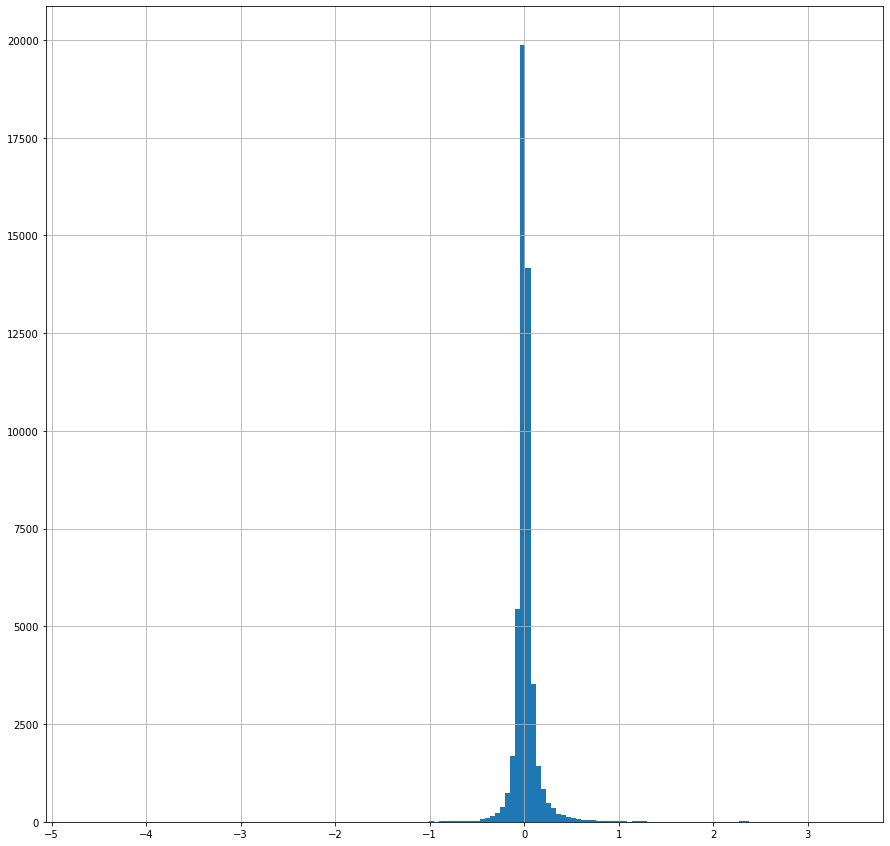

In [79]:
df.logerror.hist(bins=150, figsize=(15, 15))
plt.show()

## 2. Explore

In [58]:
df.dtypes

logerror                         float64
transactiondate                   object
bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
fips                              object
latitude                          object
longitude                         object
lotsizesquarefeet                float64
roomcnt                          float64
yearbuilt                        float64
taxvaluedollarcnt                float64
logerror_bins                   category
zillow_price_est                 float64
zillow_error                     float64
dtype: object

In [59]:
import split

In [60]:
train, validate, test = split.train_validate_test_split(df,'logerror')
train.shape, validate.shape, test.shape

((28376, 15), (12162, 15), (10135, 15))

In [61]:
# top 5% of train dataset (~3 std from mean)
high_outliers = train.logerror.quantile(q=0.95)
# top 16% of train dataset (~2 std from mean)
upper_mid_outliers = train.logerror.quantile(q=0.84)
# bottom 16 of train dataset (~2 std from mean)
lower_mid_outliers = train.logerror.quantile(q=0.16)
# bottom 5% percent of dataset (~3 std from mean)
low_outliers = train.logerror.quantile(q=0.05)

In [62]:
#upper-high outliers are top 5% of the data
train_high_outliers = train[train.logerror > high_outliers]
# mid-outliers are between 95-86 percentiles
train_upper_mid_outliers = train[(train.logerror < high_outliers) & (train.logerror > upper_mid_outliers)]
# center-mass data will be 86-16 percentiles
train_center_mass = train[(train.logerror > lower_mid_outliers) & (train.logerror < upper_mid_outliers)]
# lower mid will be 16-5 percentiles
train_lower_mid_outliers = train[(train.logerror < lower_mid_outliers) & (train.logerror > low_outliers)]
# low outliers are bottom 5% of data
train_low_outliers = train[train.logerror < low_outliers]

In [63]:
train_high_outliers.head()

,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt,logerror_bins,zillow_price_est,zillow_error
6077,0.682494,2017-02-10,2.0,3.0,1664.0,los_angeles,34564547.0,-117951796.0,45552.0,0.0,1989.0,113633.0,"(0.5, 0.75]",2.248578e+05,1.112248e+05
42971,0.249837,2017-08-03,2.0,3.0,1305.0,ventura,34347921.0,-119086382.0,5984.0,6.0,1973.0,260054.0,"(0.0, 0.25]",3.338614e+05,7.380741e+04
4360,1.241767,2017-01-30,2.5,3.0,1737.0,orange_county,33634757.0,-117880460.0,1994.0,6.0,1966.0,947794.0,"(1.0, 1.8]",3.281002e+06,2.333208e+06
24814,0.282481,2017-05-17,1.0,2.0,985.0,los_angeles,33922357.0,-118291926.0,6997.0,0.0,1954.0,41990.0,"(0.25, 0.5]",5.569621e+04,1.370621e+04
51178,0.391733,2017-09-12,3.0,4.0,2445.0,los_angeles,34178295.0,-118659793.0,11728.0,0.0,1967.0,457450.0,"(0.25, 0.5]",6.768170e+05,2.193670e+05


In [64]:
numeric_cols = train.select_dtypes('float64').columns
non_numeric_cols = train.select_dtypes('object').columns

In [65]:
train_numeric = train[train.select_dtypes('float64').columns]
train_non_numeric = train[train.select_dtypes('object').columns]

### Now that I have built the outlier subsets, I want to visually show the variable relationships for:
- train dataset vs. high outliers vs. upper-mid vs. center mass vs. low-mid vs. low
- scatter plots for quant variables
- add hue for interesting categorical columns like fips
- Note: I'm going to need to build subplots for this

In [66]:
train.head(5)

,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt,logerror_bins,zillow_price_est,zillow_error
3323,-0.021395,2017-01-24,2.0,3.0,1115.0,los_angeles,34212796.0,-118543472.0,13043.0,0.0,1956.0,254647.0,"(-0.25, 0.0]",249256.585265,-5390.414735
2470,-0.023569,2017-01-18,1.0,2.0,1754.0,los_angeles,34105205.0,-118108463.0,8666.0,0.0,1938.0,582447.0,"(-0.25, 0.0]",568879.837510,-13567.162490
7019,-0.083987,2017-02-16,3.0,4.0,2497.0,los_angeles,34465169.0,-118494179.0,18496.0,0.0,1989.0,462901.0,"(-0.25, 0.0]",425611.362951,-37289.637049
50112,-0.039345,2017-09-06,3.0,3.0,1780.0,los_angeles,34567611.0,-118172344.0,5069.0,0.0,2005.0,260000.0,"(-0.25, 0.0]",249968.984278,-10031.015722
48192,-0.048605,2017-08-29,2.0,5.0,1875.0,los_angeles,33966020.0,-118023774.0,5940.0,0.0,1951.0,522149.0,"(-0.25, 0.0]",497376.640046,-24772.359954


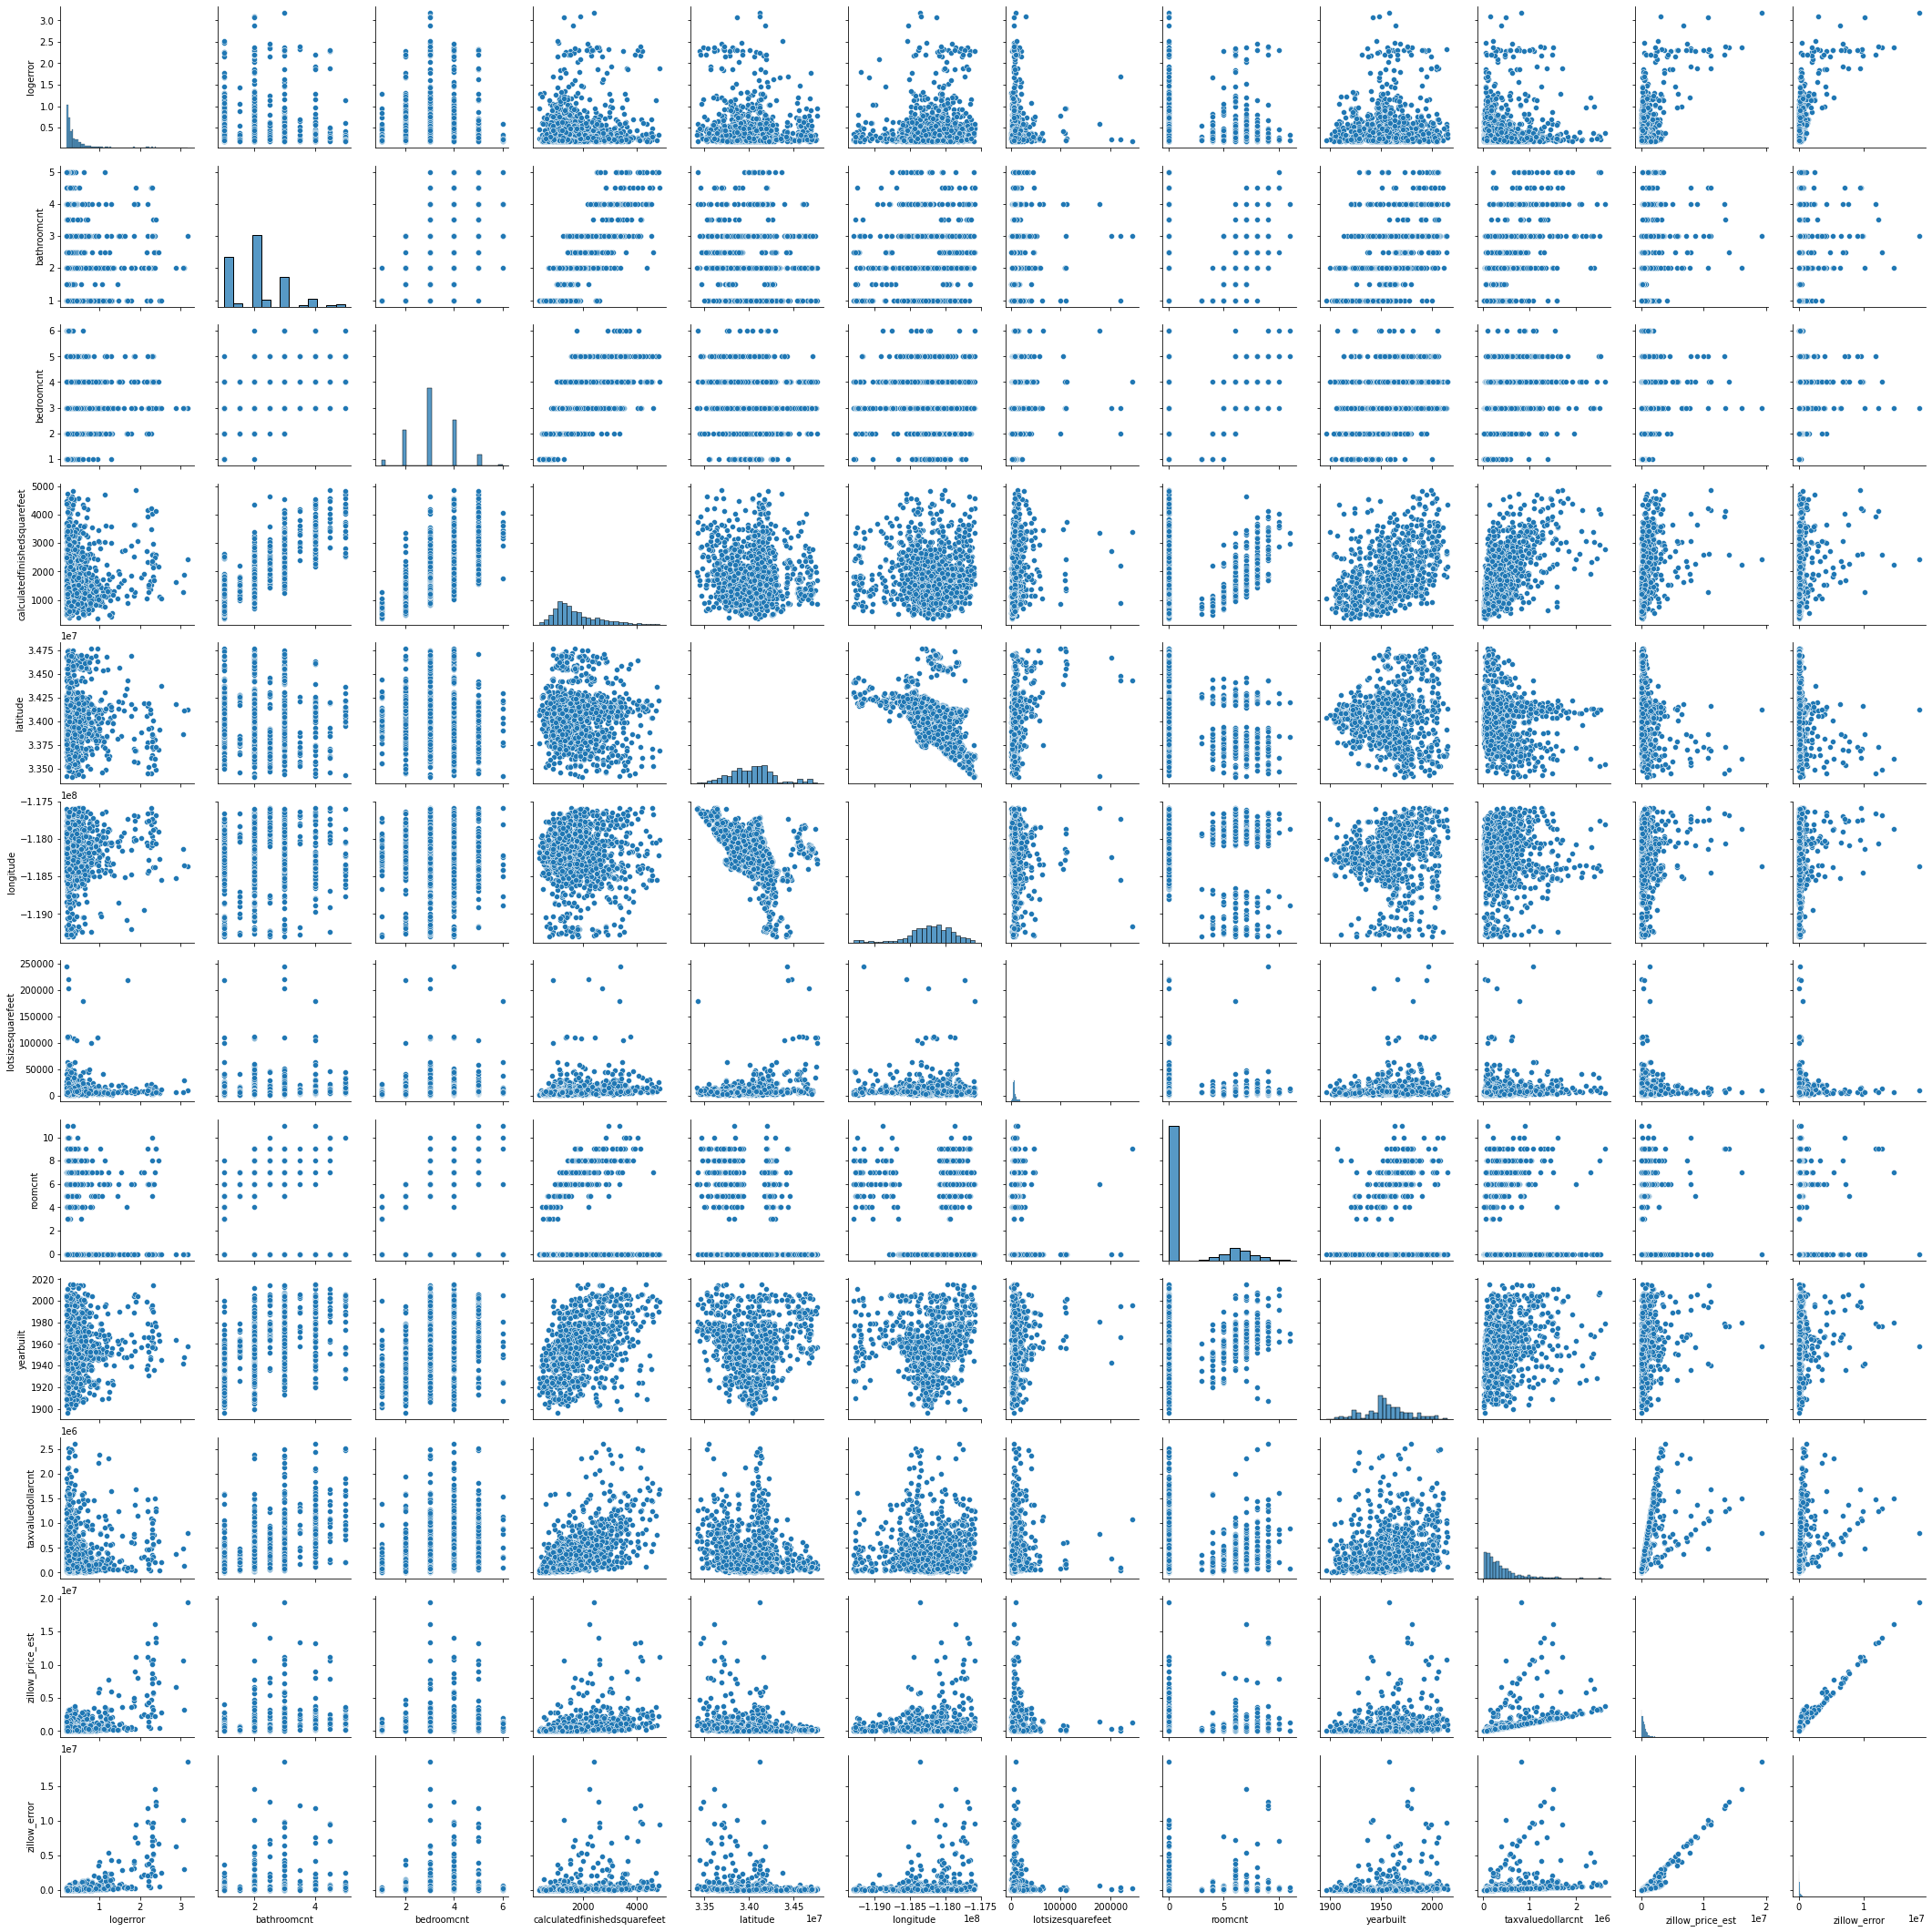

In [67]:
sns.pairplot(data=train_high_outliers)
plt.show()

# Questions I want to answer graphically and statistically:
1. Do logerror outliers have occur more freguently in some counties than others, proportionally?
2. Does logerror have a realtionship to certain sq_ft ranges
3. Does high logerror occur more frequently, proportionally, at certain home price (taxvalue) ranges? Might be an opportunnity for further subsets
4. Is high logerror correlated to certain BD ranges?
5. Is high logerror correlated to certain BR ranges?
5. Is high logerror correlated to certain yearbuilt ranges?

In [68]:
train_numeric.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt',
       'zillow_price_est', 'zillow_error'],
      dtype='object')